# Introduction to Linear Regression

Linear modeling is on of the more popular and widely used types of models that we employ in data analytics. Linear models are easy to understand, and are (generally) the first (if not only) modeling technique a general business audience may have seen. 


## Let's import our modules

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# remember, we need to include this statment to allow plots to appear directly in the notebook
%matplotlib inline

## Example: Advertising Data

The following example data used here is from [An Introdution to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) found [here](http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv))

In [2]:
# read data into a DataFrame
adata = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
adata.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Remember from last class, in predictive analytics we seek to select and tune **models** that allow us to, given a set of **input values**, **predict** a **target value**. 

In business, we develop models to help support business decision making proceses. Such processes focus on providing organizational direction and involve some form of decision making. 

The data above consists of three input variables and one target variable. 

Inpute: 
- TV: advertising dollars spent on TV 
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

In looking at this data, we can see a number of potential questions that can be asked:
1. Does increases in advertising spending result in increased sales?
3. Given limited spending, which if any, of these advertising mediums shoudl we choose spend out moeny?

NOTE1: As discussed in last class, the names that we use for these column can vary across different fields (business analytics, data science, statistics, etc). You may hear explanatory and response variables, or  independent and dependent. Also features, attributes and response or target - or dimensions As I refered to them in last class, I'll try to remain consistent in using the terms input and target variables -- but may also talk about "dimensions" as well. 

NOTE2: The analysis a conduct here does not explore/consider any correlations between the input variables. The intent here is to illustrate regression modeling as a technique for prediction. For further reading see any andvanced textbook dealing with generalized linear modeling. Also, for simplicty sake, we will not be splitting our data into training, validation, or testing datasets (refer to last lecture).

## Explore the data

Let's identify the nubmer of observations in our dataset

In [3]:
len(adata.index)

200

alternatively, we could use shape 

In [4]:
adata.shape[0]

200

From this, we can see there are 200 observations (or cases) in our dataset

From visual inspection we can see a that TV would seem to indicate a relationship between TV ad spend and sales. We also see a simular, but weaker relationship between radio ad spend and sales. Finally, though there may be an effect, newspaper ad spend would seem to have the weakest effect. 


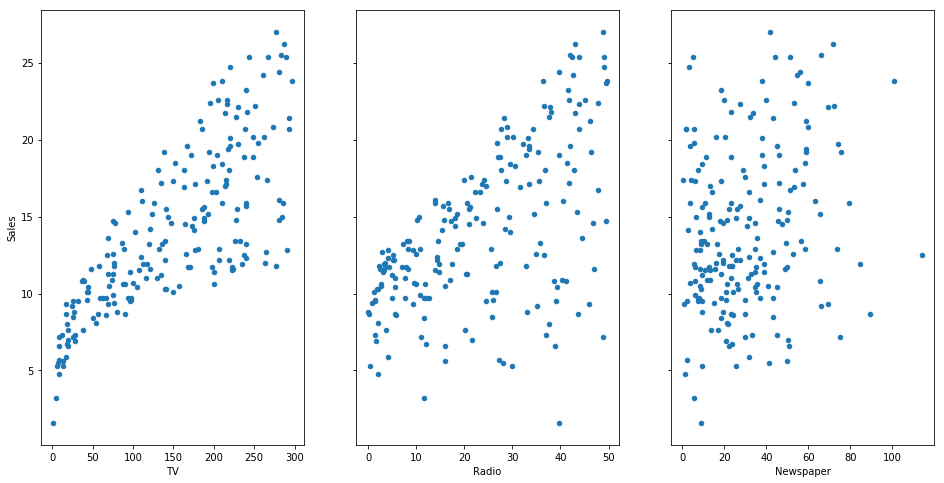

In [5]:
# visualize the relationship between the input and the target variables using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
adata.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
adata.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1], figsize=(16, 8))
adata.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2], figsize=(16, 8))

## Aligning Units

Now, as we often need to deal with in data analytics, we need to ensure we are (whenever possible) aligning our units. Let's say that in this particular case, we had difference in measurement scale - where, advertising spend is represented in 100's of dollars, while sales is represented in 1000's of dollars.  

We should therefore,  transform our data to ensure we are using the same measure. 

In [6]:
adata.TV = adata['TV'] / 10
adata.Radio = adata['Radio'] / 10
adata.Newspaper = adata['Newspaper'] / 10

But, notice, that despite that transormation, we in essence have the same relationship... the same "signal", just the ratio values change under the transformaion of the data. We can see this in the following plots, which (other than the change in units) looks the same as our previous set. 


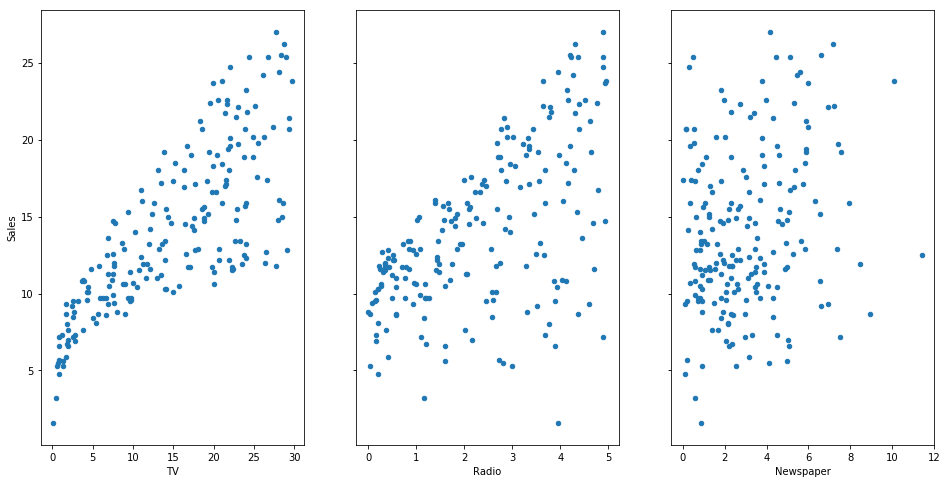

In [7]:
# visualize the relationship between the input and the target variables using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
adata.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
adata.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
adata.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

But, in our data... each of the sales measures are __unit sales__ of some unkown product that is sold at some unkown price (we'll call these "widgets"). Therefore, let's transform our data back to it's original form

In [8]:
adata.TV = adata['TV'] * 10
adata.Radio = adata['Radio'] * 10
adata.Newspaper = adata['Newspaper'] * 10

## Identify a candidate model to "tune"

All of you should be familar with linear modeling. You studied linear modeling in statistics when you were exposed to linear regression.

We'll build on this knowledge of linear regression to develop a number of linear predictive models, 

## Developing a Linear Predictive Model 

Our objective in linear predictive modeling is to find a "line" that best fits the data we have and the data we've yet seen('best' are those models that come closest (lease error) to predicting the acctual target variables observed and will be obderved in the future). 

The form of the model we use is as follows:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the input variable of interst
- $\beta_0$ is the intercept (where, if the input variable were zero, the value of our target would be)
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. We can view these as parameters of our predictive model which we attempt to "tune" through a learning process that produces the best fitting line for both current and future data. 

Tuning the model parameters: "Learning" The Model Coefficients

We tune the parameters of our model by identifying coefficients through using the **least squares criterion**, which finds the line that  minimizes the difference between the predicted values and any actual target values. 

<img src="./images/errors_linear_model.png">

NOTE: What elements are present in the diagram?
- The black dots are the actual **observed values** of our **target variable** (y) at the given the input (x) values.
- The blue line represents the values that our model predicts if given any arbitrary input value. 
- The red lines are the **errors**, which are the differences between the values that our model predicted, and the values we actural observed in our target variable. 

Since  "grade school" you would have been introduced to linear models in the form y = mx + b. In statistics $\beta_0$ represents the slope, while $\beta_1 represetns the intercept. 

<img src="./images/slope_intercept.png">

## Building our model

Like most projects in Python, there are many different packages to choose from. For machine learning (learning from data, as we are doing here) the **Scikit-Learn** is the most widely used. We'll use the Scikit-Learn LinearRegression model to estimate the model coefficients for the advertising data (and also use numpy for vector calculations (in our case, to calculate the mean)):

Let's first import these packages

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np

_NOTE: Scikit-learn can be a bit tricky to install. You first must have numpy, then scipy (in that order) installed. Then, if you install via pip, you'll need vc++ 14 installed. It's just easier though to download a precompiled library "whl" file http://www.lfd.uci.edu/~gohlke/pythonlibs/#scikit-learn._ and then pip install scikit_learn‑0.18.1‑cp36‑cp36m‑win_amd64.whl (or whatever the latest version is when you do this).


Now, let's develop a simple linear predictive model for each of our three inputs TV, Radio, and Newpaper ad spend.

### Predicting sales from TV ad spend

In [10]:
input_cols = ['TV']
tv_spend = adata[input_cols]
sales = adata.Sales

tv_model = LinearRegression()
tv_model.fit(tv_spend, sales)

# print intercept and coefficients
print(tv_model.intercept_)
print(tv_model.coef_)

7.03259354913
[ 0.04753664]


As we can see, the tv_model predicts a 0.047 unit increase in widget sales for every one extra unit spent on TV advertising. 


We now have a model that we can use to predict values (in this case, sales) from a given set of inputs (in this case, spend on TV advertising)

In [11]:
tv_model.predict(tv_spend)

array([ 17.97077451,   9.14797405,   7.85022376,  14.23439457,
        15.62721814,   7.44616232,   9.76595037,  12.74649773,
         7.44140866,  16.53041431,  10.17476548,  17.23871025,
         8.16396559,  11.66741599,  16.73482186,  16.32125309,
        10.25557777,  20.40940417,  10.32212907,  14.03474068,
        17.41459582,  18.31779199,   7.6600772 ,  17.88520856,
         9.99412625,  19.52997632,  13.82557947,  18.44614092,
        18.85970969,  10.38868036,  20.95607553,  12.39948025,
        11.653155  ,  19.65832525,  11.58185004,  20.85149492,
        19.72012288,  10.58358059,   9.08142275,  17.87094757,
        16.65876324,  15.44657891,  20.98935118,  16.86792445,
         8.22576322,  15.35625929,  11.2966302 ,  18.43663359,
        17.83291826,  10.21279479,  16.53041431,  11.80527225,
        17.31952254,  15.71278409,  19.52046899,  16.48763133,
         7.37961102,  13.50708398,  17.05331735,  17.04856369,
         9.57580381,  19.45391769,  18.4081116 ,  11.91

And, if we want to visualize our model...

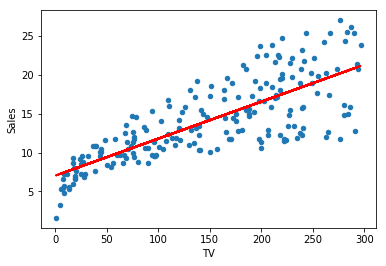

In [12]:
# first, plot the observed data
adata.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(tv_spend, tv_model.predict(tv_spend), c='red', linewidth=2)

_NOTE: For those students with data modeling experience, you may notice from the scatterplot that there is evidence of heteroskedasticity. For ths course, we will not concern ourselves with this level of detail - but, you're welcome to "tune your models" accordingly. _

Now, we can use this model to answer a couple key questions:

__1) If our current spend on TV ads is \$2,000, what would our expected impact on sales if we increase our TV ad spending to \$3,000?__

In [13]:
tv_model.predict(3000) - tv_model.predict(2000)

array([ 47.53664043])

In [28]:
(tv_model.predict(3000) - tv_model.predict(2000))[0]

47.536640433019755

So, using our model, we would predict the sales to increase by 47.54 units.



__2) If we spent \$2,350 on TV advertising, what would we expect our units sales to be?__

In [15]:
(float)(tv_model.predict(2350))

118.74369856672408

NOTE: Though we've followed the statistical technique to build our model - How "reasonable" it is to use this model to answer such questions depends on the influence of possible other "unmeasured" factors and on our sample/historical data. This modeling is included here as an illustration. "Is it good enough" involves many factors, including what our expectations are surrounding it's accuracy (sometimes we want something "rough", but we must be careful that other might not realize this and overestimate the models predictive capacity). As discussed in last class, we have various ways of increasing the predictive capacity of a model -- getting lot's and lot's of data is one of them, also, splitting out sample (if large enough) into training, validation, and test data and conducting multiple model builds. 

### Create models that predict resulting sales from Radio and Newspaper ad spending

Simular to what we did with TV ad spend, let's create a "rough model" for Radio and Newspaper spending.

#### Radio spending

In [16]:
input_cols = ['Radio']
radio_spend = adata[input_cols]
sales = adata.Sales

radio_model = LinearRegression()
radio_model.fit(radio_spend, sales)

# print intercept and coefficients
print(radio_model.intercept_)
print(radio_model.coef_)

9.31163809516
[ 0.20249578]


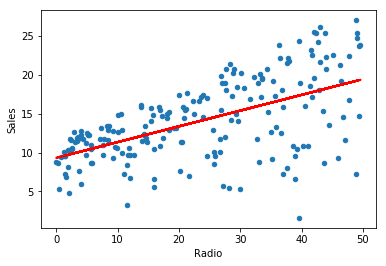

In [17]:
# first, plot the observed data
adata.plot(kind='scatter', x='Radio', y='Sales')

# then, plot the least squares line
plt.plot(radio_spend, radio_model.predict(radio_spend), c='red', linewidth=2)

In [29]:
(radio_model.predict(3000) - radio_model.predict(2000))[0]

202.49578339243965

Out model indicates that we should expect a 202.50 increase in units sold is we increase from 2000 to 3000 in spending. 

Or more generally, one unit of increased spend would equal...

In [31]:
(radio_model.predict(1) - radio_model.predict(0))[0]

0.20249578339243968

...A 0.2025 increase in units sold

#### Newspaper spending

In [18]:
input_cols = ['Newspaper']
newspaper_spend = adata[input_cols]
sales = adata.Sales

newspaper_model = LinearRegression()
newspaper_model.fit(newspaper_spend, sales)

# print intercept and coefficients
print(newspaper_model.intercept_)
print(newspaper_model.coef_)

12.3514070693
[ 0.0546931]


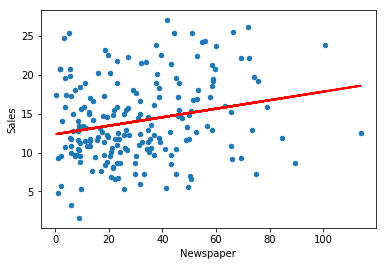

In [19]:
# first, plot the observed data
adata.plot(kind='scatter', x='Newspaper', y='Sales')

# then, plot the least squares line
plt.plot(newspaper_spend, newspaper_model.predict(newspaper_spend), c='red', linewidth=2)

In [32]:
(newspaper_model.predict(1) - newspaper_model.predict(0))[0]

0.054693098472274215

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

There are many measures we can use. Once such measure is the mean square error for our tv_model predictions.

Here, we calculate the root mean square error for each of our three predictive models

In [20]:
import numpy as np
np.mean(((tv_model.predict(tv_spend) - sales) ** 2)**.5)

2.5498060389274864

In [21]:
np.mean(((radio_model.predict(radio_spend) - sales) ** 2) **.5)

3.3202187976420667

In [22]:
np.mean(((newspaper_model.predict(newspaper_spend) - sales) ** 2) **.5)

4.1465597438384876

This RMSE value represents the average number of widgets our predicted value is off from our target value. Is this acceptable? Answering this depends heavily on the context, what our expectations are, and needs are. 

From your previous statistics courses, you should be familiar with R-squared. 

Let's calculate the R-squared value for each of our predictive models:

In [23]:
# print the R-squared value for the model
tv_model.score(tv_spend, sales)

0.61187505085007099

In [24]:
radio_model.score(radio_spend, sales)

0.33203245544529525

In [25]:
newspaper_model.score(newspaper_spend, sales)

0.052120445444305163

As we start to introduce more traditional statistical measures of fit, we must be aware that many of these measures are only accurate under conditions such as normality of the error in our prediction across all possible input values, or that this error doesn't change as we increase or decrease our input values, etc. 

What assumptions are reasonable? As I discussed in the last lecture, our answer to this question relies on our underlying assumptions and in our understanding of the context in which we are using these models. 


__Are these "good" measures of fit?__

The measures above are one of many measures we can use to indicate how well the model fits our data - aka measures of fit. Though we can without much doubt provide a measure of fit to known data, it's a much more difficult problem when we attempt to say something about how our model will fit future (or unseen) data. 

For our purposes, measures of fit serve as a means to compare models and indicate which one may be better than another, and to also indicate when we are making improvments in our model's prediction accuracy. As discussed in class, we also need to be aware of the problem of overfitting, and address this by splitting our samples into training, validation, and testing data sets. 

## Multiple Linear Regression

Now, often we can improve the predictive capacity of a model by including more data. In our case, it would be best to use all our input variables to help predict our target variable. 

We can do this be extending the simple linear regression models we created above to also include multiple inputs. In statistics, this is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different input variable, and each input variable has its own coefficient (measure of effect on our target variable). 

Therefore, we should create a model that fits the following form:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$


In [26]:
input_cols = ['TV', 'Radio', 'Newspaper']
ad_spend = adata[input_cols]
sales = adata.Sales

ad_model = LinearRegression()
ad_model.fit(ad_spend, sales)

# print intercept and coefficients
print(ad_model.intercept_)
print(ad_model.coef_)

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]


In [27]:
# Mean squared error
print(np.mean((ad_model.predict(ad_spend) - sales) ** 2)**.5)

# R-Squared value 
ad_model.score(ad_spend, sales)

1.66857014072


0.89721063817895208

What are a few key things we learn from this output?

- Our data indicates that TV and Radio ad spend both have significant positive effect on sales, whereas Newspaper ad spending actually has a slight negative effect.
- This new multi-input model acheives a better fit (has a higher **R-squared** (0.897)) than any of the previous models.

Considering this, if we are trying to determine where to best place our ad spending dollars, TV would be our first priority, with radio second. Based on our sales data, we should reduce or eliminate newspaper spending. 

If we are attempting to predict changes in sales resulting from changes in advertising spending, we should simplify our model to include only TV and Radio advertising as input variables (which could be necessariy anyway, since if we took action on this model we would have stopped spending ad dollars on newspaper advertising).

## Input Selection

How do I decide **which inputs to include** in a linear predictuve model? As we discussed in last class, this is the process of choosing the least complex model which performs the best (by performance, we mean "fits the data"). Therefore, to test our model, we should check whether the fit measures we use go up when you add new predictors or go down if we take them away.

There are drawbacks to this approach though. Linear regression modeling relies one a number of statistical assumptions(such as the features being independent), and if those assumptions are violated (which they usually are), some of our fit measures become less reliable or misleading. For instance, in the measures of fit we showed during last class, we can **overfit** our model and thus create a model of less predictive capacity (that is, predict future values) than a model that we discarded because of poorer fit. (see the illistrative examples of this in last class). 

So is there a better approach to feature selection? 

Yes, as we saw in last class, we can randomly partition our sample into training, validation, and test sets. This is know as k-fold cross-validation.

"In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data." (Cross-validation Wikipedia)

**k-fold cross-validation.** provides a more reliable estimate of out-of-sample error, or predictive ability of our model, and thus provides a way to choose which of your models will best **generalize** to predict targets for observations that we do not yet have data. 

There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above and that you've learned in statistics (such as p-values) only apply to linear models. We will not be covering this sci-kit functionality, but you should remember that it is there if you need it.

Note that **p-values** and **confidence intervals** are not (easily) accessible through scikit-learn.

## What we did not cover...

- Detecting relationships between our input variables (colinearity)
- Exploring model fit and analyzing model performance over different data sets.
- Transforming predictors to fit non-linear relationships (I did demonstrate this in last class with the use of higer order polynomials -- which is only once example)
- Assumptions of linear regression -- once we begin to use linear regression to develop p-values or t-statistics to explore confidence intervals, we also intruce many assumptions about our population. 

## Resources

- Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/), from which the data used in this lesson was adapted.
- [An introduction ot Machine Learning with SciKit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html)
